In [3]:
#import initial packages in
import pandas as pd
import numpy as np 

In [4]:
#Read dataset into python
housing  = pd.read_csv("housing.csv")

In [5]:
#Print dataset to see different variables
housing

,price,region,address,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON","2 ROLLO DR, Ajax, Ontario",3,3,0.799000
1,989000,"Ajax, ON","717 OLD HARWOOD AVE, Ajax, Ontario",2,1,0.989000
2,999900,"Ajax, ON","52 ADDLEY CRES, Ajax, Ontario",3,4,0.999900
3,799900,"Ajax, ON","249 MONARCH AVE, Ajax, Ontario",3,3,0.799900
4,899999,"Ajax, ON","18 MONK CRES, Ajax, Ontario",3,3,0.899999
...,...,...,...,...,...,...
7319,1899000,"Scarborough, Toronto, ON","#MAIN UN -2977 LAWRENCE AVE E AVE, Toronto, On...",8,4,1.899000
7320,752880,"Scarborough, Toronto, ON","#406 -3220 SHEPPARD AVE E, Toronto, Ontario",2,2,0.752880
7321,1150000,"Scarborough, Toronto, ON","#902 -2799 KINGSTON RD, Toronto, Ontario",3,3,1.150000
7322,550000,"Scarborough, Toronto, ON","#506 -2201 KINGSTON RD, Toronto, Ontario",1,1,0.550000


In [6]:
housing.drop(columns= ["address"], inplace= True)

In [7]:
print(housing.shape)
housing.head()

(7324, 5)


,price,region,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON",3,3,0.799000
1,989000,"Ajax, ON",2,1,0.989000
2,999900,"Ajax, ON",3,4,0.999900
3,799900,"Ajax, ON",3,3,0.799900
4,899999,"Ajax, ON",3,3,0.899999


In [8]:
#check dataset for null values and remove any
empty_entries = housing.isnull().sum()

print(empty_entries)


price        0
region       0
bedrooms     0
bathrooms    0
pricem       0
dtype: int64


In [9]:
#reduce outliers of dataset for better model
housing = housing[(housing.pricem >= 0.5) & (housing.pricem <= 2)]




In [10]:
housing

,price,region,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON",3,3,0.799000
1,989000,"Ajax, ON",2,1,0.989000
2,999900,"Ajax, ON",3,4,0.999900
3,799900,"Ajax, ON",3,3,0.799900
4,899999,"Ajax, ON",3,3,0.899999
...,...,...,...,...,...
7319,1899000,"Scarborough, Toronto, ON",8,4,1.899000
7320,752880,"Scarborough, Toronto, ON",2,2,0.752880
7321,1150000,"Scarborough, Toronto, ON",3,3,1.150000
7322,550000,"Scarborough, Toronto, ON",1,1,0.550000


In [11]:
#reset index to match record count
housing = housing.reset_index().drop(columns= ["index"])
housing


,price,region,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON",3,3,0.799000
1,989000,"Ajax, ON",2,1,0.989000
2,999900,"Ajax, ON",3,4,0.999900
3,799900,"Ajax, ON",3,3,0.799900
4,899999,"Ajax, ON",3,3,0.899999
...,...,...,...,...,...
6078,1899000,"Scarborough, Toronto, ON",8,4,1.899000
6079,752880,"Scarborough, Toronto, ON",2,2,0.752880
6080,1150000,"Scarborough, Toronto, ON",3,3,1.150000
6081,550000,"Scarborough, Toronto, ON",1,1,0.550000


In [12]:
#verify the number of Non-null data is equal for all fields
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      6083 non-null   int64  
 1   region     6083 non-null   object 
 2   bedrooms   6083 non-null   int64  
 3   bathrooms  6083 non-null   int64  
 4   pricem     6083 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 237.7+ KB


In [13]:
#Using scikit-learn we are able to split data 
#Convert citys into 0-1 reigon area codes
from sklearn.model_selection import train_test_split
x = pd.get_dummies(housing.drop(columns= ["pricem", 'price']), prefix= 'region', dtype = int)
y = housing['pricem']


In [14]:
#Split train-test data 70-30 split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [136]:
#Scale dataset and perform linear regression on it
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_scaled, y_train)
rval = reg.score(x_scaled, y_train)
print("R-squared score (Linear Regression):", rval)

R-squared score (Linear Regression): 0.546261869061243


In [140]:
#calculate the mean absoloute error of the dataset to measure performance
from sklearn.metrics import mean_absolute_error
train_predict = reg.predict(x_scaled)
err_train = mean_absolute_error(y_train, train_predict)
print("Mean absolute error for training:", err_train)
test_scaled = scaler.transform(x_test)
test_predict = reg.predict(test_scaled)
err_test = mean_absolute_error(y_test, test_predict)
print("Mean absolute error for test:", err_test)

Mean absolute error for training: 0.20037329075509644
Mean absolute error for test: 0.1964117352330766


Text(0, 0.5, 'Predicted')

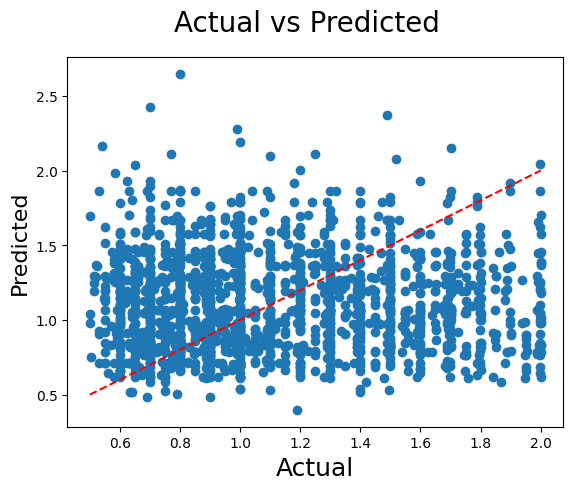

In [138]:
#Plot labelled output against predicted output
import matplotlib.pyplot as plt 
fig = plt.figure()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line of best fit
plt.scatter(y_test,test_predict_poly)
fig.suptitle('Actual vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predicted', fontsize=16)                          # Y-label

In [139]:
#Print table to visualize the result using pandas dataframe
import pandas as pd
result_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': test_predict})
result_df['Difference'] = result_df['Actual Price'] - result_df['Predicted Price']
print(result_df)

      Actual Price  Predicted Price  Difference
5795      0.749000         0.966592   -0.217592
4276      0.799000         1.187295   -0.388295
3824      1.788000         1.657999    0.130001
3783      1.650000         1.529092    0.120908
5481      0.899000         0.930459   -0.031459
...            ...              ...         ...
2955      0.798888         0.926553   -0.127665
5500      0.749900         1.088663   -0.338763
4570      0.999999         0.991006    0.008993
4497      0.579000         0.741983   -0.162983
3482      0.825000         1.054483   -0.229483

[1825 rows x 3 columns]
